In [49]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

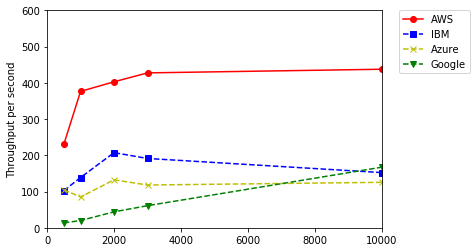

In [24]:
import matplotlib.pyplot as plt
plt.plot([500,1000,2000,3000,10000],[500/2.172,1000/2.657,2000/4.964,3000/7.018,10000/22.855], 'ro-', label="AWS")
plt.plot([500,1000,2000,3000,10000],[500/4.881,1000/7.208,2000/9.643,3000/15.681,10000/65.649], 'bs--', label="IBM")
plt.plot([500,1000,2000,3000,10000],[500/4.774,1000/11.759,2000/15.102,3000/25.419,10000/79.657], 'yx--', label="Azure")
plt.plot([500,1000,2000,3000,10000],[500/36.936,1000/49.831,2000/45.446,3000/49.143,10000/59.777], 'gv--', label="Google")
plt.axis([0, 10000, 0, 600])
plt.ylabel('Throughput per second')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

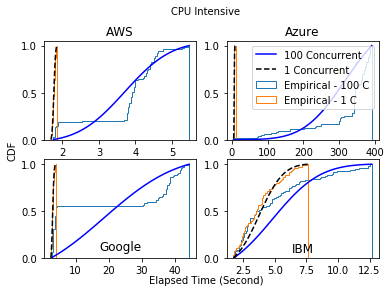

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(6, 4))

fig.text(0.5, 1, 'CPU Intensive', ha='center', va='top')
fig.text(0.5, 0.04, 'Elapsed Time (Second)', ha='center')
fig.text(0.04, 0.5, 'CDF', va='center', rotation='vertical')

with open("files/aws_concurrent_100_512matn_1536mb.result") as f:
    aws_concurrent_100_512matn_1536mb = json.load(f)
with open("files/aws_sequential_100_512matn_1536mb.result") as f:
    aws_sequential_100_512matn_1536mb = json.load(f)
with open("files/ibm_concurrent_100_512mb.result") as f:
    ibm_concurrent_100_512mb = json.load(f)
with open("files/ibm_sequential_100_512mb.result") as f:
    ibm_sequential_100_512mb = json.load(f)
with open("files/google_concurrent_100_512matn_2gb.result") as f:
    google_concurrent_100_512matn_2gb = json.load(f)
with open("files/google_sequential_100_512matn_2gb.result") as f:
    google_sequential_100_512matn_2gb = json.load(f)
with open("files/azure_concurrent_100_512matn.result") as f:
    azure_concurrent_100_512matn = json.load(f)
with open("files/azure_sequential_100_512matn.result") as f:
    azure_sequential_100_512matn = json.load(f)

    
is_mu=np.mean(ibm_sequential_100_512mb)
is_sigma=np.std(ibm_sequential_100_512mb)
ic_mu=np.mean(ibm_concurrent_100_512mb)
ic_sigma=np.std(ibm_concurrent_100_512mb)
ax1 = plt.subplot(2,2,4)

mu = 200
sigma = 25
n_bins = 50

# plot the cumulative histogram
ic_n, ic_bins, ic_patches = ax1.hist(ibm_concurrent_100_512mb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 100 C')

ic_y = mlab.normpdf(ic_bins, ic_mu, ic_sigma).cumsum()
ic_y /= ic_y[-1]

is_n, is_bins, is_patches = ax1.hist(ibm_sequential_100_512mb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 1 C')

is_y = mlab.normpdf(is_bins, is_mu, is_sigma).cumsum()
is_y /= is_y[-1]

ax1.plot(ic_bins, ic_y, 'b', linewidth=1.5, label='100 Concurrent')
ax1.plot(is_bins, is_y, 'k--', linewidth=1.5, label='1 Concurrent')

ax1.grid(False)
ax1.set_title('IBM', y=0.00)


gc_mu=np.mean(google_concurrent_100_512matn_2gb)
gc_sigma=np.std(google_concurrent_100_512matn_2gb)
gs_mu=np.mean(google_sequential_100_512matn_2gb)
gs_sigma=np.std(google_sequential_100_512matn_2gb)
ax2 = plt.subplot(2,2,3)

gc_n, gc_bins, gc_patches = ax2.hist(google_concurrent_100_512matn_2gb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 100 C')

gc_y = mlab.normpdf(gc_bins, gc_mu, gc_sigma).cumsum()
gc_y /= gc_y[-1]

gs_n, gs_bins, gs_patches = ax2.hist(google_sequential_100_512matn_2gb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 1 C')

gs_y = mlab.normpdf(gs_bins, gs_mu, gs_sigma).cumsum()
gs_y /= gs_y[-1]

ax2.plot(gc_bins, gc_y, 'b', linewidth=1.5)
ax2.plot(gs_bins, gs_y, 'k--', linewidth=1.5)
ax2.set_title('Google', y=0.02)


azc_mu=np.mean(azure_concurrent_100_512matn)
azc_sigma=np.std(azure_concurrent_100_512matn)
azs_mu=np.mean(azure_sequential_100_512matn)
azs_sigma=np.std(azure_sequential_100_512matn)
ax3 = plt.subplot(2,2,2)

azc_n, azc_bins, azc_patches = ax3.hist(azure_concurrent_100_512matn, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 100 C')

azc_y = mlab.normpdf(azc_bins, azc_mu, azc_sigma).cumsum()
azc_y /= azc_y[-1]

azs_n, azs_bins, azs_patches = ax3.hist(azure_sequential_100_512matn, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 1 C')

azs_y = mlab.normpdf(azs_bins, azs_mu, azs_sigma).cumsum()
azs_y /= azs_y[-1]

ax3.plot(azc_bins, azc_y, 'b', linewidth=1.5, label='100 Concurrent')
ax3.plot(azs_bins, azs_y, 'k--', linewidth=1.5, label='1 Concurrent')
ax3.set_title('Azure')
ax3.legend(loc="upper right")
    
awsc_mu=np.mean(aws_concurrent_100_512matn_1536mb)
awsc_sigma=np.std(aws_concurrent_100_512matn_1536mb)
awss_mu=np.mean(aws_sequential_100_512matn_1536mb)
awss_sigma=np.std(aws_sequential_100_512matn_1536mb)
ax4 = plt.subplot(2,2,1)

awsc_n, awsc_bins, awsc_patches = ax4.hist(aws_concurrent_100_512matn_1536mb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 100 C')

awsc_y = mlab.normpdf(awsc_bins, awsc_mu, awsc_sigma).cumsum()
awsc_y /= awsc_y[-1]

awss_n, awss_bins, awss_patches = ax4.hist(aws_sequential_100_512matn_1536mb, 100, normed=1, histtype='step',
                           cumulative=True, label='Empirical - 1 C')

awss_y = mlab.normpdf(awss_bins, awss_mu, awss_sigma).cumsum()
awss_y /= awss_y[-1]

ax4.plot(awsc_bins, awsc_y, 'b', linewidth=1.5)
ax4.plot(awss_bins, awss_y, 'k--', linewidth=1.5)
ax4.set_title('AWS')

plt.show()

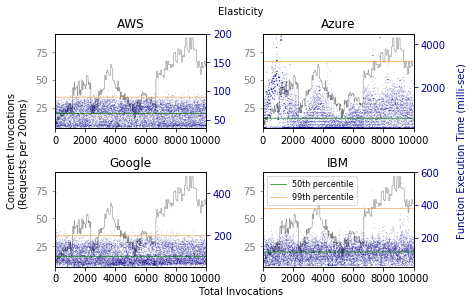

In [50]:
cnt=0
wl_x = list(range(4))
wl_y = list(range(4))
e_x = list(range(4))
e_y = list(range(4))
elastic_list = list(range(4))
axes = list(range(5))
axes2 = list(range(5))

#AWS
with open("files/elasticity.cpu-intensive-flops-nodejs.log.result") as f:
    elastic_list[0] = json.load(f)
# Azure
with open("files/flops-nodejs.10005.logs.dict.result.elastic.result") as f:
    elastic_list[1] = json.load(f)
# Google
with open("files/elasticInvoke.flops-nodejs-storage.10005.stackdriver.google.log.google.0.log.combined") as f:
    elastic_list[2] = json.load(f)
# IBM
with open("files/elasticInvoke.elasticInvoke.flops-nodejs-2.ibm.10005.log.ibm.0.log.combined.updated") as f:
    elastic_list[3] = json.load(f)


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(6, 4))
fig.text(0.5, 1, 'Elasticity', ha='center', va='top')
fig.text(0.5, 0.00, 'Total Invocations', ha='center') 
fig.text(-0.04, 0.5, 'Concurrent Invocations\n(Requests per 200ms)', va='center', rotation='vertical')
fig.text(1, 0.5, 'Function Execution Time (milli-sec)', va='center', rotation="vertical", color='darkblue')

axes[cnt] = plt.subplot(2,2,cnt+1)

result_data = elastic_list[cnt]
wl_x[cnt] = [x[0] for x in result_data]
wl_y[cnt] = [x[2] for x in result_data]
e_x[cnt] = [x[0] for x in result_data]
e_y[cnt] = [x[1] for x in result_data]

p50 = np.percentile(e_y[cnt], 50)
p90 = np.percentile(e_y[cnt], 90)
p99 = np.percentile(e_y[cnt], 99)
axes[cnt].plot(wl_x[cnt], wl_y[cnt], '-', color='grey',linewidth=0.5)

# Make the y-axis label, ticks and tick labels match the line color.
axes[cnt].tick_params('y', colors='grey')
axes[cnt].set_title('AWS')

axes2[cnt] = axes[cnt].twinx()
axes2[cnt].plot(e_x[cnt], e_y[cnt], '.', color='darkblue', markersize=0.1)
axes2[cnt].plot(wl_x[cnt], [p50 for x in range(len(wl_x[cnt]))],  linewidth=0.7,  color='green')
#axes2[cnt].plot(wl_x[cnt], [p90 for x in range(len(wl_x[cnt]))], ',', color='orange')
axes2[cnt].plot(wl_x[cnt], [p99 for x in range(len(wl_x[cnt]))],  linewidth=0.5,  color='darkorange')
axes2[cnt].set_xlim([0,10000])
axes2[cnt].set_ylim([35,200])
axes2[cnt].tick_params('y', colors='darkblue')

cnt += 1
axes[cnt] = plt.subplot(2,2,cnt+1)
result_data = elastic_list[cnt]
wl_x[cnt] = [x[0] for x in result_data]
wl_y[cnt] = [x[3] for x in result_data]
e_x[cnt] = [x[0] for x in result_data]
e_y[cnt] = [x[4] for x in result_data]

p50 = np.percentile(e_y[cnt], 50)
p90 = np.percentile(e_y[cnt], 90)
p99 = np.percentile(e_y[cnt], 99)

axes[cnt].plot(wl_x[cnt], wl_y[cnt], '-', color='grey',linewidth=0.5)
axes[cnt].tick_params('y', colors='grey')
axes[cnt].set_title('Azure')

axes2[cnt] = axes[cnt].twinx()
axes2[cnt].plot(e_x[cnt], e_y[cnt], '.', color='darkblue', markersize=0.1)

axes2[cnt].plot(wl_x[cnt], [p50 for x in range(len(wl_x[cnt]))], linewidth=0.7, color='green')
axes2[cnt].plot(wl_x[cnt], [p99 for x in range(len(wl_x[cnt]))],  linewidth=0.5, color='darkorange')

axes2[cnt].set_xlim([0,10000])
axes2[cnt].set_ylim([100,4500])
axes2[cnt].tick_params('y', colors='darkblue')

cnt += 1
axes[cnt] = plt.subplot(2,2,cnt+1)
result_data = elastic_list[cnt]
wl_x[cnt] = [x[0] for x in result_data]
wl_y[cnt] = [x[3] for x in result_data]
e_x[cnt] = [x[0] for x in result_data]
e_y[cnt] = [x[4] for x in result_data]

p50 = np.percentile(e_y[cnt], 50)
p90 = np.percentile(e_y[cnt], 90)
p99 = np.percentile(e_y[cnt], 99)

axes[cnt].plot(wl_x[cnt], wl_y[cnt], '-', color='grey',linewidth=0.5)
axes[cnt].tick_params('y', colors='grey')
axes[cnt].set_title('Google')

axes2[cnt] = axes[cnt].twinx()
axes2[cnt].plot(e_x[cnt], e_y[cnt], '.', color='darkblue', markersize=0.1)

axes2[cnt].plot(wl_x[cnt], [p50 for x in range(len(wl_x[cnt]))],  linewidth=0.7, color='green')
axes2[cnt].plot(wl_x[cnt], [p99 for x in range(len(wl_x[cnt]))],  linewidth=0.5, color='darkorange')

axes2[cnt].set_xlim([0,10000])
axes2[cnt].set_ylim([50,500])
axes2[cnt].tick_params('y', colors='darkblue')

cnt += 1
axes[cnt] = plt.subplot(2,2,cnt+1)
result_data = elastic_list[cnt]
wl_x[cnt] = [x[0] for x in result_data]
wl_y[cnt] = [x[2] for x in result_data]
e_x[cnt] = [x[0] for x in result_data]
e_y[cnt] = [x[1] for x in result_data]

p50 = np.percentile(e_y[cnt], 50)
p90 = np.percentile(e_y[cnt], 90)
p99 = np.percentile(e_y[cnt], 99)

axes[cnt].plot(wl_x[cnt], wl_y[cnt], '-', color='grey',linewidth=0.5)
axes[cnt].tick_params('y', colors='grey')
axes[cnt].set_title('IBM')

axes2[cnt] = axes[cnt].twinx()
axes2[cnt].plot(e_x[cnt], e_y[cnt], '.', color='darkblue', markersize=0.1)

axes2[cnt].plot(wl_x[cnt], [p50 for x in range(len(wl_x[cnt]))], linewidth=0.7, color='green', label="50th percentile")
axes2[cnt].plot(wl_x[cnt], [p99 for x in range(len(wl_x[cnt]))], linewidth=0.5, color='darkorange', label="99th percentile")
axes2[cnt].legend(loc='upper left',prop={'size': 8})

axes2[cnt].set_xlim([0,10000])
axes2[cnt].set_ylim([20,600])
axes2[cnt].tick_params('y', colors='darkblue')

fig.tight_layout()
plt.show()